## Space X  Falcon 9 First Stage Landing Prediction using Machine Learning

In this notebook, we will create a machine learning pipeline to predict if the first stage will land given the data from the preceding notebooks.

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


### Objectives

Perform Data Analysis

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data

----

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing          # to standardize our data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV    # Allows us to test parameters of classification algorithms and find the best one
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

Function is to plot the confusion matrix.

In [6]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

Load the dataframe


In [7]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [9]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


**TASK 1:** Create a NumPy array from the column <code>Class</code> in <code>data</code>, then assign it  to the variable <code>Y</code>,make sure the output is a Pandas series

In [10]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

**TASK 2:** Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.

In [11]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

**TASK 3:** Use the function train_test_split to split the data X and Y into training and test data.

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


In [15]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}   # limited-memory BFGS algorithm

# Create a logistic regression object
lr = LogisticRegression()
# create a  GridSearchCV object
grid_search = GridSearchCV(lr, parameters, cv=10)
# Fit the object 
logreg_cv = grid_search.fit(X_train, Y_train)
# find the best parameters from the dictionary
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# accuracy on the validation data
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


**TASK 5:** Calculate the accuracy on the test data using the method <code>score</code>:

In [16]:
lr_score  = logreg_cv.score(X_test, Y_test)
print(f"Logistic Regression - Accuracy using method score: {lr_score}")

Logistic Regression - Accuracy using method score: 0.8333333333333334


Lets look at the confusion matrix:


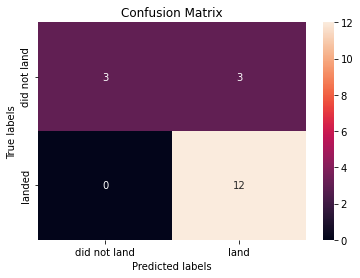

In [17]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


**TASK 6:** Create a support vector machine object. Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [19]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

grid_search = GridSearchCV(svm, parameters, cv=10)
svm_cv = grid_search.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


**TASK 7:**  Calculate the accuracy on the test data

In [20]:
svm_score  = svm_cv.score(X_test, Y_test)
print(f"SVM - Accuracy using method score: {svm_score}")

SVM - Accuracy using method score: 0.8333333333333334


plot the confusion matrix

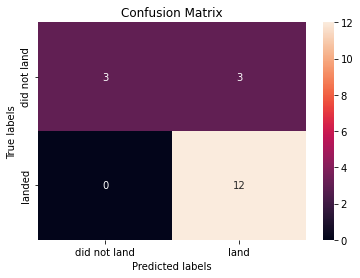

In [21]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

**TASK 8:**  Create a decision tree classifier object. Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [23]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()

grid_search = GridSearchCV(tree, parameters, cv=10)
tree_cv = grid_search.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

c:\Users\benzs\Anaconda3\envs\netvlad\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\benzs\Anaconda3\envs\netvlad\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\benzs\Anaconda3\envs\netvlad\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\benzs\Anaconda3\envs\netvlad\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.8732142857142857


**TASK 9:**  Calculate the accuracy of tree_cv on the test data

In [24]:
tree_score = tree_cv.score(X_test, Y_test)
print(f"Decision Tree - Accuracy using method score: {tree_score}")

Decision Tree - Accuracy using method score: 0.8888888888888888


We can plot the confusion matrix


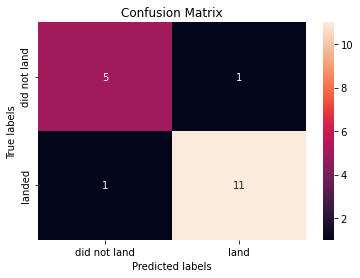

In [25]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

**TASK 10:**  Create a k nearest neighbors object. Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [26]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

grid_search = GridSearchCV(KNN, parameters, cv=10)
knn_cv = grid_search.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


**TASK 11:**  Calculate the accuracy of knn_cv on the test data 

In [27]:
knn_score = knn_cv.score(X_test, Y_test)
print(f"KNN - Accuracy using method score: {knn_score}")

KNN - Accuracy using method score: 0.8333333333333334


We can plot the confusion matrix


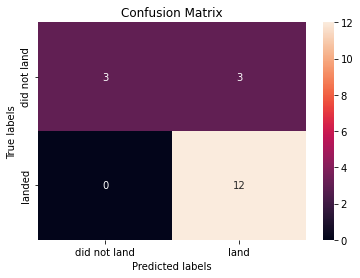

In [28]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [29]:
algorithms = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K Nearest Neighbours']

scores = [lr_score, svm_score, tree_score, knn_score]

best_scores = [logreg_cv.best_score_, svm_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_]

column_names = ['Algorithm', 'Accuracy Score', 'Best Score']

In [30]:
df = pd.DataFrame(list(zip(algorithms, scores, best_scores)),columns = column_names)
df

,Algorithm,Accuracy Score,Best Score
0,Logistic Regression,0.833333,0.846429
1,Support Vector Machine,0.833333,0.848214
2,Decision Tree,0.888889,0.873214
3,K Nearest Neighbours,0.833333,0.848214


**TASK 12:**  Find the method which performs the best:

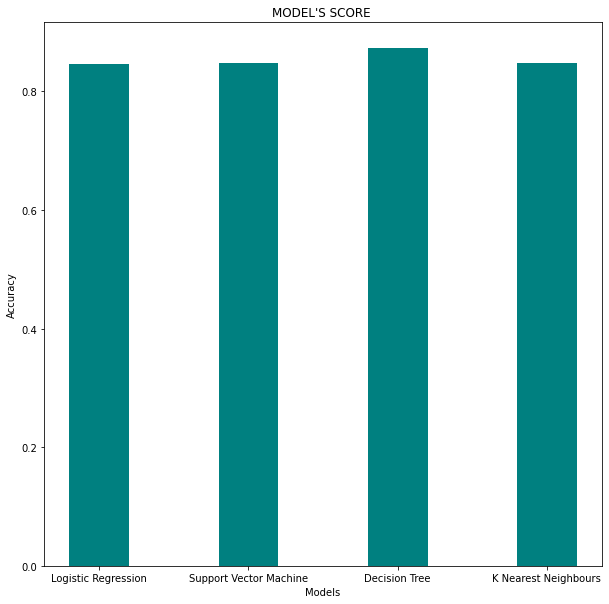

In [32]:
# creating the dataset
fig = plt.figure(figsize = (10, 10))
# creating the bar plot
plt.bar(algorithms, best_scores, color ='teal', width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("MODEL'S SCORE ")
plt.show()

We observed that Decision Tree model has best accuracy on test dataset